<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [ ]:
## Write your code here

# For Employment column
df["Employment"].isnull().sum()

# There are no missing values


np.int64(0)

In [22]:
# For "JobSat" column
df["JobSat"].isnull().sum()
df["JobSat"].value_counts()

# We are filling the Nan values with median here
median = df["JobSat"].median()

df["JobSat"].fillna(median, inplace=True)

# Check if there are any null values left
df["JobSat"].isnull().sum()

np.int64(0)

In [23]:
# For "RemoteWork" column we will fill the null values with most frequent values

most_freq = df["RemoteWork"].value_counts().idxmax()

df["RemoteWork"].fillna(most_freq, inplace=True)

# Check if there are any null values left
df["RemoteWork"].isnull().sum()

np.int64(0)

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [39]:
## Write your code here
# Convert 'YearsCodePro' to numeric, handling non-numeric values
df["YearsCodePro"] = df["YearsCodePro"].replace("Less than 1 year", 0)
df["YearsCodePro"] = df["YearsCodePro"].replace("More than 50 years", 55)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')  # Convert entire column to numeric

# Replacing Nan values with median
df["YearsCodePro"].fillna(df["YearsCodePro"].median(), inplace=True)


C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_8956\1615620166.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["YearsCodePro"].fillna(df["YearsCodePro"].median(), inplace=True)


In [40]:
# Define experience bins and labels
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '>20']

# Create new column for experience ranges
df["ExperienceRange"] = pd.cut(df["YearsCodePro"], bins=bins, labels=labels, right=False)

df["ExperienceRange"]

0         5-10
1        10-20
2          >20
3         5-10
4         5-10
         ...  
65432      0-5
65433     5-10
65434     5-10
65435      0-5
65436     5-10
Name: ExperienceRange, Length: 65437, dtype: category
Categories (4, object): ['0-5' < '5-10' < '10-20' < '>20']

In [41]:
# Calculate median JobSat for each experience range
median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median()

median_satisfaction

C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_8956\1140723412.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median()


ExperienceRange
0-5      7.0
5-10     7.0
10-20    7.0
>20      7.0
Name: JobSat, dtype: float64

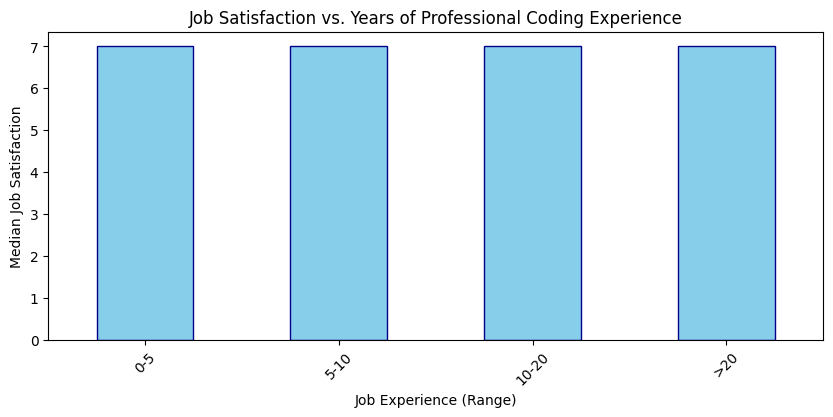

In [45]:
# Plotting Bar Chart
plt.figure(figsize=(10,4))
median_satisfaction.plot(kind='bar', color='skyblue', edgecolor='darkblue')
plt.title("Job Satisfaction vs. Years of Professional Coding Experience")
plt.xlabel("Job Experience (Range)")
plt.ylabel("Median Job Satisfaction")
plt.xticks(rotation=45)
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_8956\3285741379.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["JobSat"], palette='Blues', edgecolor='black')


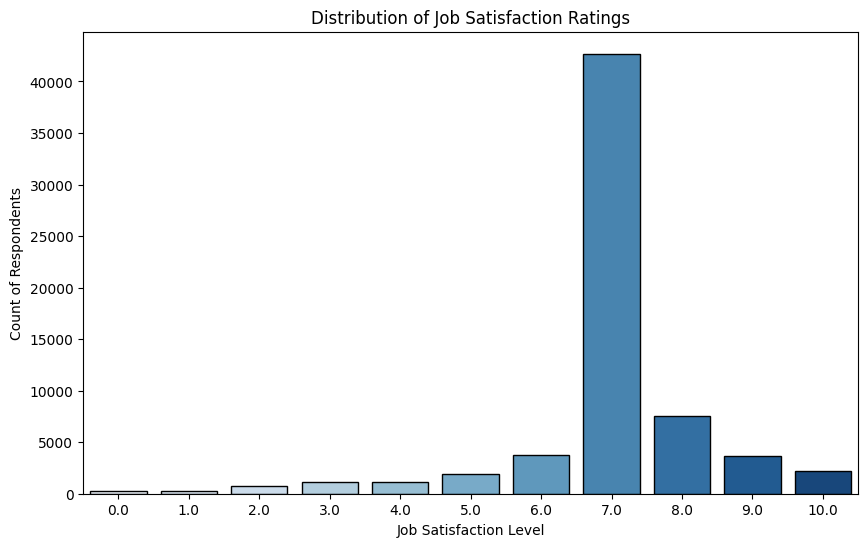

In [47]:
## Write your code here
plt.figure(figsize=(10,6))
sns.countplot(x=df["JobSat"], palette='Blues', edgecolor='black')

# Add labels and title
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Count of Respondents")
plt.title("Distribution of Job Satisfaction Ratings")

# Show the plot
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_8956\3739437538.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['RemoteWork'], palette='coolwarm', edgecolor='black')


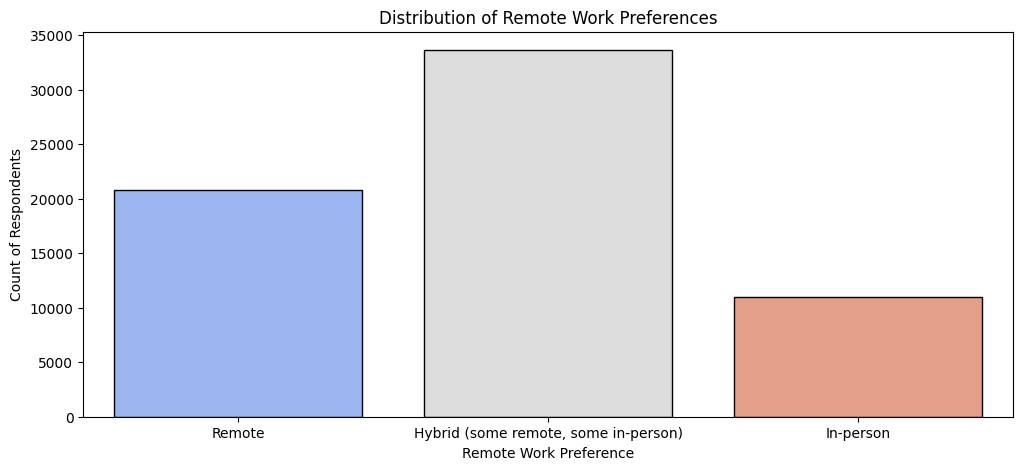

In [55]:
## Write your code here
# **1. Count Plot for Remote Work Distribution**
plt.figure(figsize=(12, 5))
sns.countplot(x=df['RemoteWork'], palette='coolwarm', edgecolor='black')

plt.xlabel("Remote Work Preference")
plt.ylabel("Count of Respondents")
plt.title("Distribution of Remote Work Preferences")

#plt.xticks(rotation=10)
plt.show()


In [59]:
# **2. Cross-tabulation of Remote Work by Employment Type**
remote_by_employment = pd.crosstab(df['Employment'], df['RemoteWork'], normalize='index') * 100
print("\nRemote Work Preferences by Employment Type:")
print(remote_by_employment)

# **3. Cross-tabulation of Remote Work by Job Roles**
remote_by_devType = pd.crosstab(df['DevType'], df['RemoteWork'], normalize='index') * 100
print("\nRemote Work Preferences by Job Roles:")
print(remote_by_devType)


Remote Work Preferences by Employment Type:
RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                            44.302144   
Employed, full-time;Employed, part-time                                        40.094340   
Employed, full-time;Independent contractor, fre...                             37.391060   
Employed, full-time;Independent contractor, fre...                             43.478261   
Employed, full-time;Independent contractor, fre...                              0.000000   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                             57.142857   
Student, full-time;Student, part-time;Retired                                 100.000000   
Student, part-time                 

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [68]:
## Write your code here
# **1. Convert the "LanguageHaveWorkedWith" column into separate binary columns**
language_dummies = df['LanguageHaveWorkedWith'].str.get_dummies(sep=';')
# **2. Group by country and sum the language counts**
language_counts = df[['Country']].join(language_dummies).groupby('Country').sum()


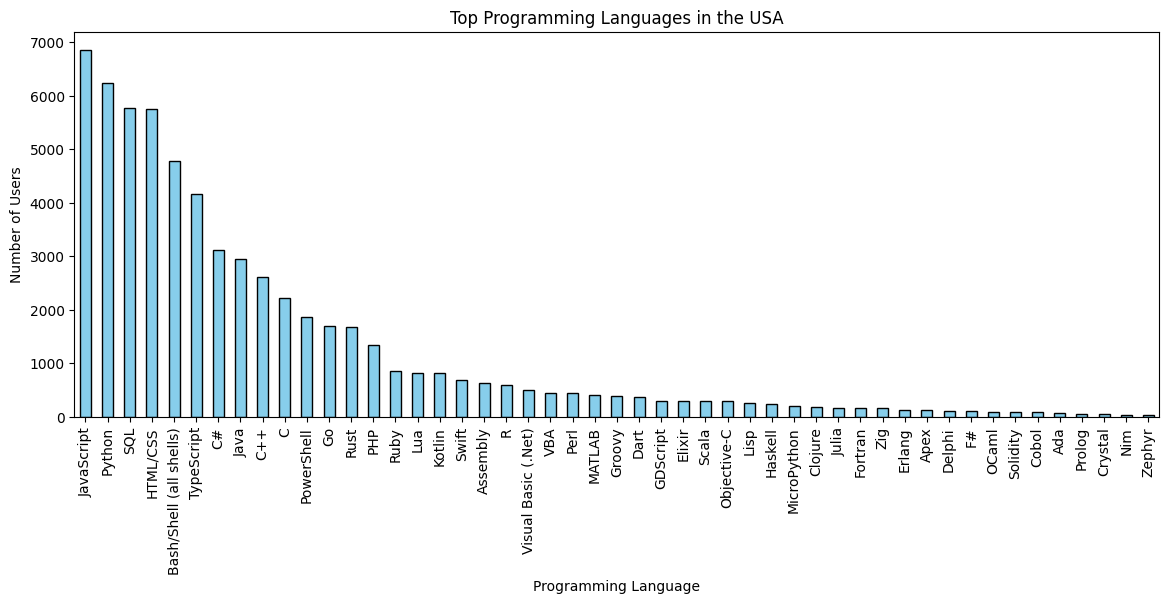

In [72]:
# **3. Bar Plot for One Country (e.g., USA)**
plt.figure(figsize=(14, 5))
language_counts.loc['United States of America'].sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor="black")

plt.xlabel("Programming Language")
plt.ylabel("Number of Users")
plt.title("Top Programming Languages in the USA")
plt.xticks(rotation=90)
plt.show()

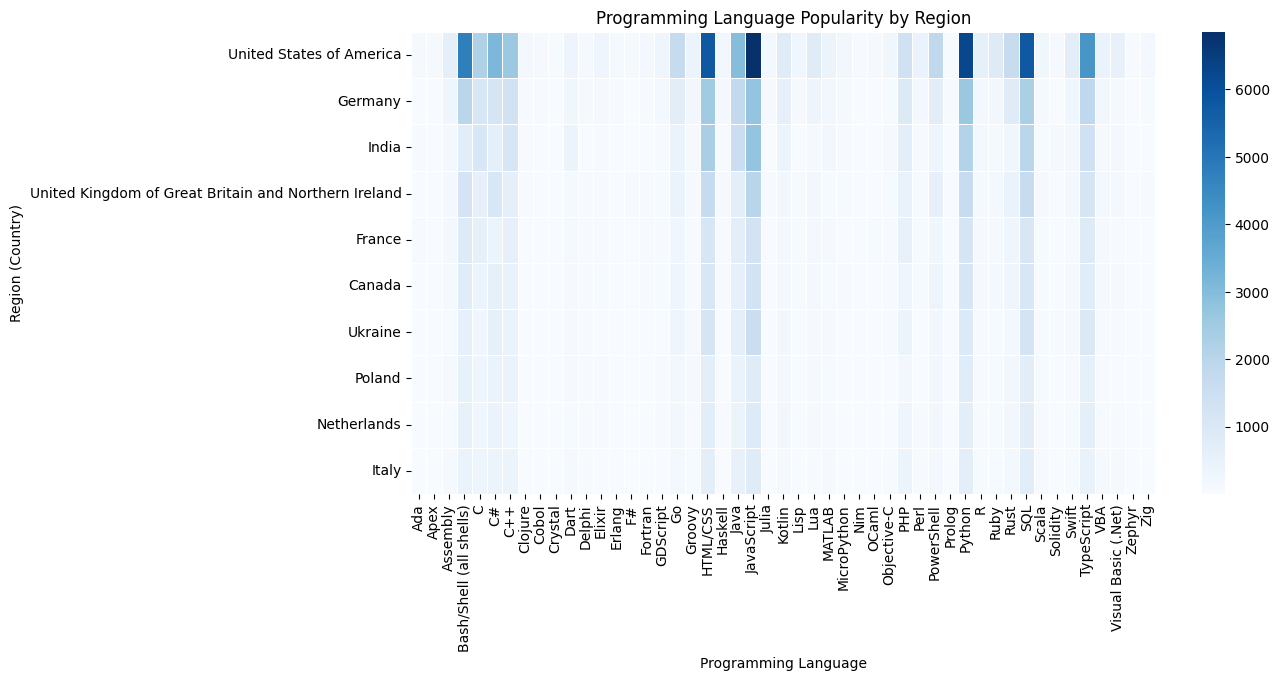

In [82]:
# **4. Heatmap for All Regions**
plt.figure(figsize=(12, 6))
top_countries = language_counts.sum(axis=1).nlargest(10).index  # Top 10 countries
filtered_data = language_counts.loc[top_countries]
sns.heatmap(filtered_data, cmap="Blues", linewidths=0.5)

plt.xlabel("Programming Language")
plt.ylabel("Region (Country)")
plt.title("Programming Language Popularity by Region")
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [89]:
## Write your code here
correlation = df["YearsCodePro"].corr(df["JobSatPoints_1"])
print(correlation)

-0.0018461676209374244


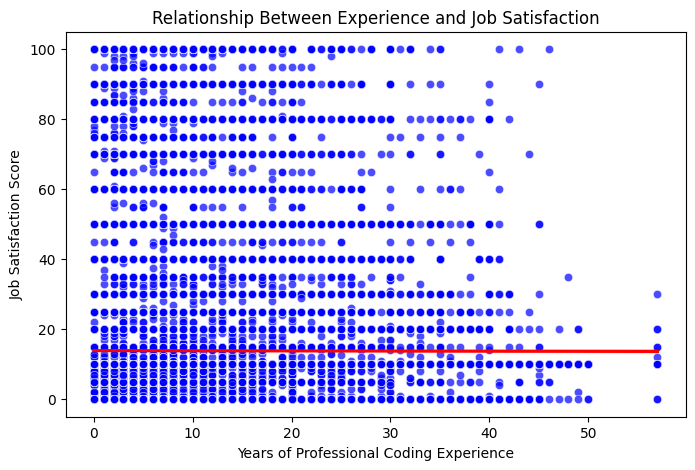

In [90]:
# Create scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['YearsCodePro'], y=df['JobSatPoints_1'], alpha=0.7, color="blue")

# Add trend line using regression plot
sns.regplot(x=df['YearsCodePro'], y=df['JobSatPoints_1'], scatter=False, color="red")

# Customize the plot
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Job Satisfaction Score")
plt.title("Relationship Between Experience and Job Satisfaction")

plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [93]:
## Write your code here
df["EdLevel"].fillna(df["EdLevel"].mode()[0], inplace=True)
df["EdLevel"].isnull().sum()

np.int64(0)

In [100]:
# **1. Convert the "LanguageHaveWorkedWith" column into separate binary columns**
employment_dummies = df['Employment'].str.get_dummies(sep=';')
# **2. Group by country and sum the language counts**
employment_counts = df[['EdLevel']].join(employment_dummies).groupby('EdLevel').sum()

In [101]:
employment_counts

,"Employed, full-time","Employed, part-time",I prefer not to say,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,"Student, full-time","Student, part-time"
EdLevel,,,,,,,,,
"Associate degree (A.A., A.S., etc.)",1260,137,9,323,22,127,23,189,98
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",22098,1666,178,4399,336,1842,235,2821,1062
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",12489,753,53,2679,110,555,149,584,345
Primary/elementary school,201,79,51,159,155,114,12,583,90
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",2312,149,29,485,23,86,112,87,46
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",1860,623,92,902,338,528,24,2712,427
Some college/university study without earning a degree,4494,669,51,1634,174,618,107,1484,522
Something else,448,69,83,145,45,84,19,166,66


In [ ]:
# Cross-tabulation
edu_emp_ct = pd.crosstab(employment_counts['EdLevel'], df['Employment'], normalize='index') * 100
print("\nCross-tabulation of Education Level and Employment:")
print(edu_emp_ct)


Cross-tabulation of Education Level and Employment:
Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                           59.063023   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                  65.288055   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)               70.778428   
Primary/elementary school                                     13.961606   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                69.797980   
Secondary school (e.g. American high school, Ge...            25.202831   
Some college/university study without earning a...            46.778199   
Something else                                                40.450644   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associ

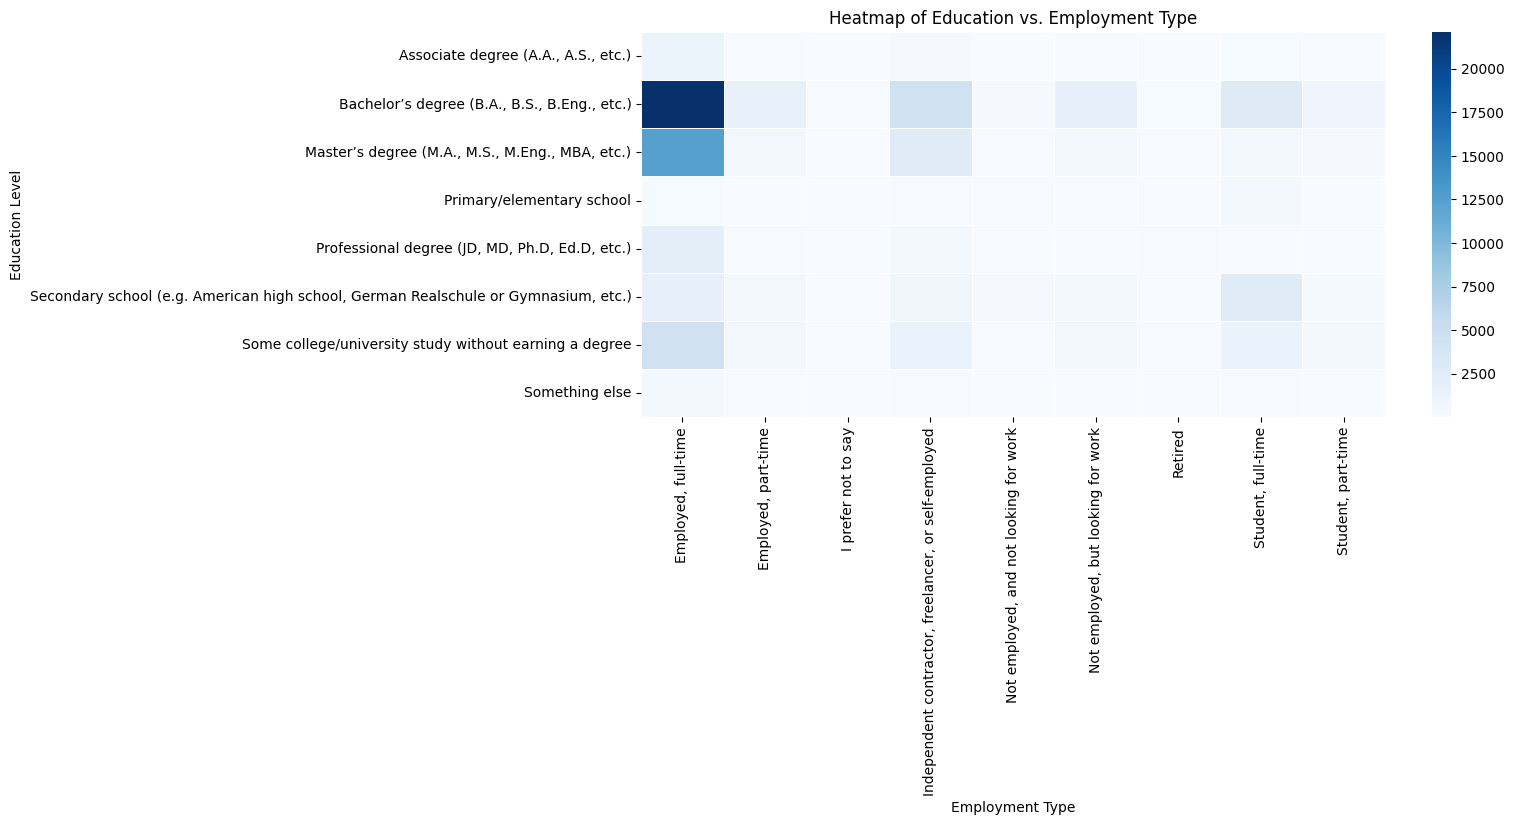

In [102]:
# Heatmap for better visualization
plt.figure(figsize=(12, 5))
sns.heatmap(employment_counts, cmap="Blues", linewidths=0.5)

plt.xlabel("Employment Type")
plt.ylabel("Education Level")
plt.title("Heatmap of Education vs. Employment Type")

plt.show()

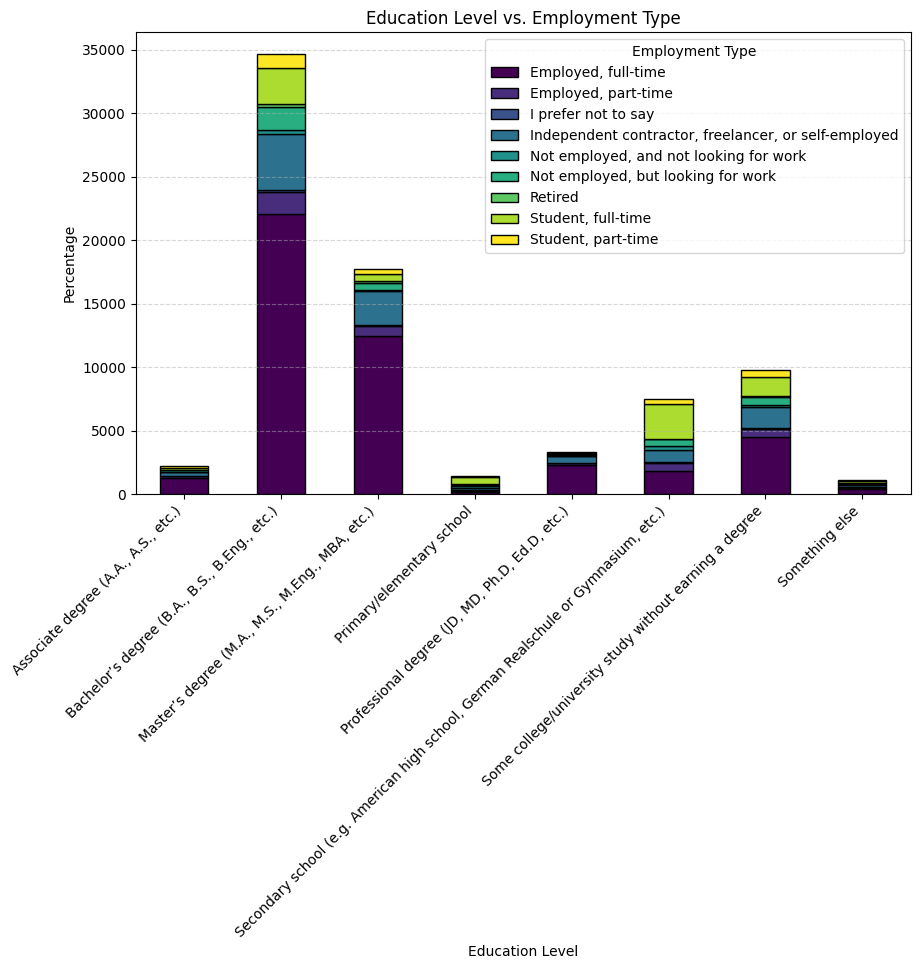

In [103]:
employment_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', edgecolor='black')

plt.xlabel("Education Level")
plt.ylabel("Percentage")
plt.title("Education Level vs. Employment Type")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Employment Type")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [104]:
## Write your code here
modified_df = pd.concat([df, employment_dummies], axis=1)

In [106]:
modified_df.to_excel("modified_df.xlsx", index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
